# Movies - Final Project
---
## Introduction
In this project, I am going to use SQL Query language with Python to query the IMDB's movies database.

# Using SQL to query relational database 
---
A relational database is essentially a set of data tables that are all related to one another.   

For example, if you worked at a online retail store, you may have a relational database which contained various tables that altogether made up all your sales data. This could be a customers table, a products table and an employee sales table. As they all work in conjunction with one another to build a bigger picture - these tables make up a relational database. 

Movie Database (IMDb)
---

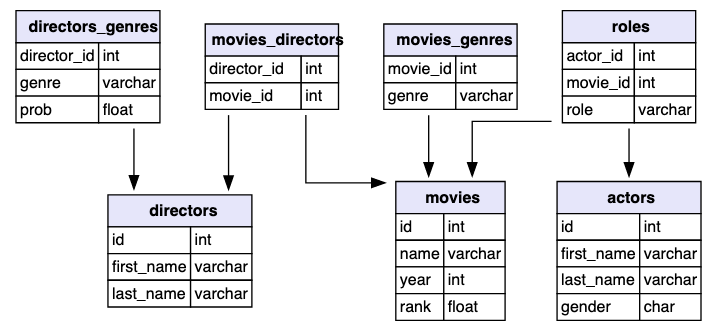



In [13]:
!pip install mysql.connector

     |████████████████████████████████| 11.9 MB 4.3 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=c65e2630e94bb552e6c72f673638c8ee2eb38c3a0e94bd0eed55e83e26cf12cc
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


In [14]:
import mysql.connector
# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

# add a function below here to execute a query (see above for code)
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None

# run a query using the execute query function
def show_table_stats():
  query = 'SHOW TABLES'
  result = execute_query(query)
  display(result)
  print('')
  for tup in result:
    for a in tup:
      query = 'SELECT COUNT(*) FROM ' + a
      print(f'{a} has {execute_query(query)[0][0]} records.')

show_table_stats()

[('actors',),
 ('directors',),
 ('directors_genres',),
 ('movies',),
 ('movies_directors',),
 ('movies_genres',),
 ('roles',)]


actors has 817718 records.
directors has 86880 records.
directors_genres has 156562 records.
movies has 388269 records.
movies_directors has 371180 records.
movies_genres has 395119 records.
roles has 3431966 records.


##Selecting All Columns From A SQL Table
by using the SQL language's SELECT statement.

In [15]:
def get_movies():
  # using the execute_query() function you ran earlier and a select statement, return the first 5 movies
  query = 'SELECT * FROM movies LIMIT 5'
  return execute_query(query)

# this code will run and test if the length of the array returned from your function is correct
actual = len(get_movies())
expected = 5

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# this code will show the first five rows of data
get_movies()

Test passed 5


[(0, '#28', 2002, None),
 (1, '#7 Train: An Immigrant Journey, The', 2000, None),
 (2, '$', 1971, 6.4),
 (3, '$1,000 Reward', 1913, None),
 (4, '$1,000 Reward', 1915, None)]

### How To Conditional Search
I am going to show you how, for example, to select movies made after 2007?

In [16]:
# The function retrievs all the latest movies after 2007
def get_new_movies(after_year=2007):
  query = 'SELECT name, year FROM movies WHERE year > ' + str(after_year)
  return execute_query(query)

# This code will run and test if length of returned array is same as expected
actual = len(get_new_movies())
expected = 1

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the output
get_new_movies()

Test passed 1


[('Harry Potter and the Half-Blood Prince', 2008)]

###Selecting On Two Criterias
I am going to select the name of all movies in 2000 that were ranked above 9 and print the names one per line, then the number of films.

In [17]:
# The function retrievs the movies with year and rank as the criteria
def get_movies_with(year=2000, rank_above=9, count=False):
  query = 'SELECT name FROM movies WHERE year = ' + str(year) + \
  ' AND rank > ' + str(rank_above)
  result = execute_query(query)
  if count:
    query = 'SELECT COUNT(*) FROM movies WHERE year = ' + str(year) + \
    ' AND rank > ' + str(rank_above)
    rec_count = execute_query(query)
    return result, rec_count[0][0]
  return result

# Get movies and the movie Count with SQL method
movie_result, rec_count = get_movies_with(count=True)
display(movie_result)
print('')
print(f'There are {rec_count} records - SQL counting method.')

# Or using the python len method
movie_result = get_movies_with(count=False)
print(f'There are {len(movie_result)} records - Python counting method.')


[('36K',),
 ('Amazones 2000',),
 ('Amor',),
 ('Anno Domini',),
 ('As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty',),
 ('Auslandstournee',),
 ('Cartas da Me',),
 ('Christmas Tree and a Wedding, A',),
 ('Clockwork Maury, A',),
 ('David Nelson Live',),
 ("Don't Kill",),
 ('Dr. Babasaheb Ambedkar',),
 ('Era outra vez',),
 ('Etat',),
 ('Funeral de los dedos, El',),
 ('Funky Town',),
 ('Game Day',),
 ('Holocaust szemei, A',),
 ('Innocents Mission, The',),
 ('Johnny the Amazing Firetruck',),
 ("Judy's Time",),
 ('Kairee',),
 ('Kehrwoche',),
 ('Laatste Joegoslavische elftal, Het',),
 ('Latitude Zero',),
 ("Man On Lincoln's Nose, The",),
 ('Markova: Comfort Gay',),
 ('Moving Illustrations of Machines',),
 ('Mnchen - Geheimnisse einer Stadt',),
 ('Our House: A Very Real Documentary About Kids of Gay & Lesbian Parents',),
 ('Pantalones',),
 ('Plus rien...',),
 ('Prison Life',),
 ('Puzzle, The',),
 ('Reshimat Ahava',),
 ('Rhapsody in Blue',),
 ('Robbers',),
 ('Sevda heit Liebe',


There are 45 records - SQL counting method.
There are 45 records - Python counting method.


###Linking Data From Two Tables
to find all the comedy films

In [18]:
# The Function uses SQL to join and retriev data from two tables
def get_comedies():
  query = "SELECT name FROM movies, movies_genres \
  WHERE movies.id = movies_genres.movie_id AND movies_genres.genre = 'comedy'"
  return execute_query(query)

# This code will run and test if length of returned array is same as expected
actual = len(get_comedies())
expected = 56425

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the first five rows
get_comedies()[0:5]

Test passed 56425


[('$',),
 ('$1,000,000 Duck',),
 ('$10,000 Under a Pillow',),
 ('$1000 a Touchdown',),
 ('$30',)]

###Linking 3 SQL Database Tables
Searching for Quentin Tarantino films, for example, I would the following SQL structure:

* SELECT name
* FROM the three tables
* WHERE the directors id matches
* AND the movies id and movies_directors id match
* AND the director's first name is Quentin and last name is Tarantino

In [19]:
# The function to get Tarantino movies
def get_tarantino():
  query = "SELECT name FROM movies, movies_directors, directors \
  WHERE directors.id = movies_directors.director_id \
  AND movies.id = movies_directors.movie_id \
  AND first_name = 'Quentin' AND last_name = 'Tarantino'"
  return execute_query(query)

# This code will run and test if length of returned array is same as expected
actual = len(get_tarantino())
expected = 10

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the first five rows
get_tarantino()

Test passed 10


[('Four Rooms',),
 ('Inglorious Bastards',),
 ('Jackie Brown',),
 ('Kill Bill: Vol. 1',),
 ('Kill Bill: Vol. 2',),
 ("My Best Friend's Birthday",),
 ('Pulp Fiction',),
 ('Reservoir Dogs',),
 ('"ER"',),
 ('"Jimmy Kimmel Live"',)]

### Read An SQL Query INTO A Pandas DataFrame 
---

SQL is a powerful tool for reading data from across tables in a relational database into one table that can be analysed with statistical tools designed to operate on single data tables, such as pandas dataframes.  

To read an SQL query into a pandas dataframe we can replace execute_query with pd.read_sql_query(), giving it the query and the database

`df = pd.read_sql_query(query, database)`


For example:
```
query = "SELECT * FROM movies"
df = pd.read_sql_query(query, mydb)
```
### Creating a movies dataframe 
---

Pandas provide a function that will execute a query on a connected database and format the result into a dataframe

The query:
```
SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id
```
will:

*  SELECT the fields first_name FROM directors
*  SELECT the fields name, year, rank FROM movies
*  SELECT the field genre FROM movies_genres
*  WHERE the ids match in movies and movies_directors
*  AND the ids matchin movies and movies_genres
*  AND the ids match in directors and movies directors

In [20]:
from google.colab import files
# The function creates a CSV file for the SQL query and downloads it
def get_movies_data():
  query = "SELECT first_name, name, year, rank FROM directors, \
  movies, movies_genres, movies_directors \
  WHERE movies.id = movies_directors.movie_id \
  AND movies.id = movies_genres.movie_id \
  AND directors.id = movies_directors.director_id"
  df = pd.read_sql_query(query, mydb)
  df.to_csv('movies.csv')
  files.download('movies.csv')
  return df

# This code will test if your movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

# This will show the first part of the dataframe
movies_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


,first_name,name,year,rank
0,'Philthy' Phil,City Dragon,1995,5.7
1,'Weird Al','Weird Al' Yankovic Video Library: His Greates...,1992,NaN
2,'Weird Al','Weird Al' Yankovic Video Library: His Greates...,1992,NaN
3,'Weird Al','Weird Al' Yankovic Video Library: His Greates...,1992,NaN
4,'Weird Al','Weird Al' Yankovic: The Ultimate Video Collec...,2003,NaN


##Data Analysis
In this section of the project I am going to analyse the movies database that was converted from an SQL relational database to a single pandas dataframe as above and was downloaded as a CSV file.

### Inspect The Dataset
First, we need to load the dataset into the Pandas DataFrame and check to see if it needs any cleaning:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true'

# The function loads the data into a pandas' DataFrame and returns the DataFrame
def create_dataframe(url):
  df = pd.read_csv(url)
  return df

# Create the DataFrame
movies_df = create_dataframe(url)
# Display the information and stats
display(movies_df.info())
display(movies_df.describe())
display(movies_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


None

,Unnamed: 0,year,rank
count,368894.000000,368894.000000,113376.000000
mean,184446.500000,1969.442222,5.995124
std,106490.669438,29.082051,1.540330
min,0.000000,1888.000000,1.000000
25%,92223.250000,1947.000000,5.100000
50%,184446.500000,1976.000000,6.200000
75%,276669.750000,1996.000000,7.100000
max,368893.000000,2007.000000,9.900000


,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### Clean the dataset 
---


In [2]:
# Drop any nulls or any duplicates from the dataset
movies_df = movies_df.drop(columns=['Unnamed: 0'])
movies_df.drop_duplicates(inplace=True)
movies_df.info()
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368893 entries, 0 to 368893
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   first_name  368893 non-null  object 
 1   last_name   368893 non-null  object 
 2   name        368893 non-null  object 
 3   year        368893 non-null  int64  
 4   rank        113376 non-null  float64
 5   genre       368893 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 19.7+ MB


,first_name,last_name,name,year,rank,genre
0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### How many movies of each genre are there?
---

In [3]:
# The function outputs a Data series with genre and the total count of each movies in it
def get_movies_by(df, column='genre'):
  df_grouped = df.groupby(column)['name'].count()
  return df_grouped

# Show the result
display(get_movies_by(movies_df))

genre
Action         12890
Adventure       8598
Animation      17038
Comedy         54667
Crime          12610
Documentary    35697
Drama          72635
Family         11074
Fantasy         4871
Film-Noir        429
Horror          7423
Music           4444
Musical         6843
Mystery         4951
Romance        13562
Sci-Fi          4957
Short          72894
Thriller       10681
War             4398
Western         8231
Name: name, dtype: int64

### Which director has the highest ranked movies?
---

In [4]:
# The function to get a DataFrame of movies with the highest ranking 
def get_highest_rank_movies(df):
  max_rank = df['rank'].max(skipna=True)
  df_filtered = df[df['rank'] == max_rank]
  return df_filtered

# Show the result-set
display(get_highest_rank_movies(movies_df))

,first_name,last_name,name,year,rank,genre
7981,Isidor,Annensky,Svadba,1944,9.9,Comedy
19264,Scott,Barkan,Dawn of the Friend,2004,9.9,Comedy
19265,Scott,Barkan,Dawn of the Friend,2004,9.9,Horror
19266,Scott,Barkan,Dawn of the Friend,2004,9.9,Short
26589,Ishmael,Bernal,Himala,1982,9.9,Drama
34471,Satyen,Bose,Dosti,1964,9.9,Drama
34472,Satyen,Bose,Dosti,1964,9.9,Family
34473,Satyen,Bose,Dosti,1964,9.9,Musical
36186,Julio (I),Bracho,Distinto amanecer,1943,9.9,Drama
36187,Julio (I),Bracho,Distinto amanecer,1943,9.9,Romance


### How many movies have ranks of over 9?
---


In [5]:
# The function to get rank 9 movies total
def get_above_rank_9_movies(df, rank=9):
  max_rank = rank
  df_filtered = df[df['rank'] > max_rank]
  return df_filtered

total_above_9_rank_movies = len(get_above_rank_9_movies(movies_df))
print(f'Total above 9 rank movies:    {total_above_9_rank_movies}')

Total above 9 rank movies:    1483


### Plot a bar chart of mean rank and genre
---

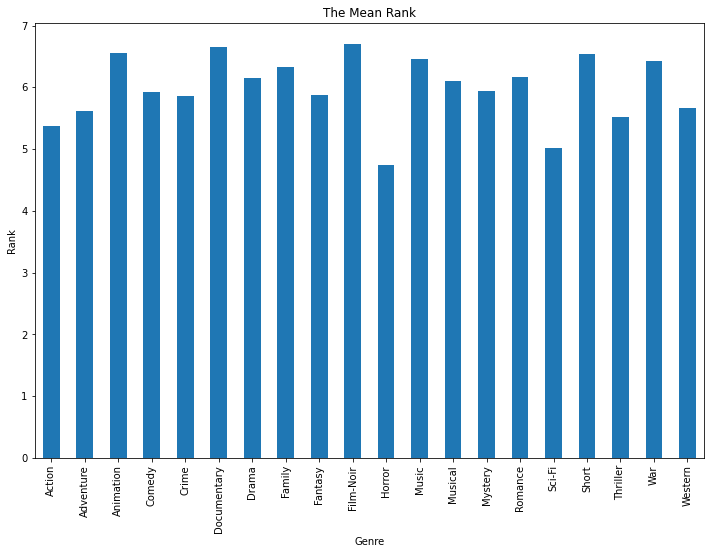

In [6]:
# The function plots a barchart of the mean rank vs genre
def show_barchart_rank_genre(df):
  rank_genre_df = df[['rank', 'genre']]
  df_grouped = rank_genre_df.groupby('genre')['rank'].mean()
  # Draw the bar graph
  plt.figure(figsize = (12,8))
  df_grouped.plot(x='genre', y=df_grouped, kind='bar')
  plt.xlabel('Genre')
  plt.ylabel('Rank')
  plt.title('The Mean Rank')
  #plt.xticks(rotation=45)
  plt.show()

# Show the chart
show_barchart_rank_genre(movies_df)

### Plot a pie chart of how many movies of each genre there are 
---


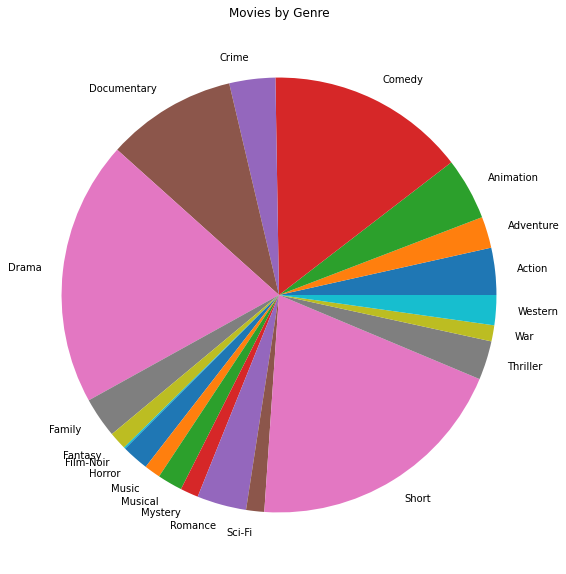

In [7]:
# The function plots a pie plot
def show_pieplot_name_genre(df):
  rank_genre_df = df[['name', 'genre']]
  df_grouped = rank_genre_df.groupby('genre')['name'].count()

  # Draw the pie plot  
  plt.figure(figsize = (12,10))
  plt.pie(df_grouped, labels=df_grouped.keys())
  plt.title('Movies by Genre')
  plt.show()

# Show the result
show_pieplot_name_genre(movies_df)

### Plot a graph showing the mean Rank for each year 

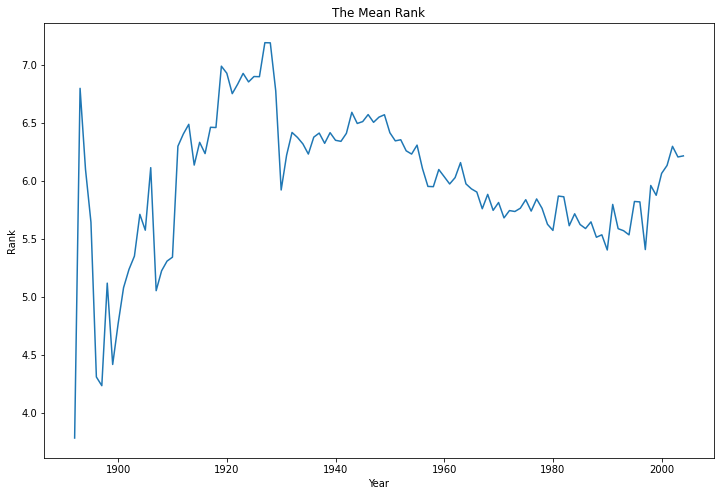

In [8]:
# The function plots the mean rank against the year
def show_rank_year(df):
  rank_year_df = df[['rank', 'year']]
  df_grouped = rank_year_df.groupby('year')['rank'].mean()
  # Draw the line graph
  plt.figure(figsize = (12,8))
  df_grouped.plot(x='year', y=df_grouped, kind='line')
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('The Mean Rank')
  plt.show()

# Show the result
show_rank_year(movies_df)

### What else can we find out from this dataset?
---
Let's make a plan of any 3 further things that we could do to interrogate and analyse this dataset:


1.  Highest ranked 'Comedy' movies?
2.  The year with the highest number of movies?
3.  Highest ranked 'Thriller' movies?

### Let's Complete The Tasks (set out above)
---


###Highest ranked 'Comedy' movies?

In [9]:
# The function finds the highest ranked comedy movies from a supplied DataFrame
def get_highest_ranked_comedy_movies(df):
  comedy_df = df[df['genre'] == 'Comedy']
  max_rank = comedy_df['rank'].max(skipna=True)
  df_filtered = comedy_df[comedy_df['rank'] == max_rank]
  df_filtered = df_filtered.sort_values(by='year', ascending=False)
  return df_filtered

# Show the result-set
display(get_highest_ranked_comedy_movies(movies_df))

,first_name,last_name,name,year,rank,genre
19264,Scott,Barkan,Dawn of the Friend,2004,9.9,Comedy
366480,Gregg,Zehentner,Dawn of the Friend,2004,9.9,Comedy
47670,Andrew,Cappelletti,"Whirlpool, The",2003,9.9,Comedy
67645,Matthew,Crandall,Prince Solitaire,2003,9.9,Comedy
328726,Debs,Tarrier,Blow Job,2002,9.9,Comedy
132970,Ivanka,Grybcheva,Voynata na taralezhite,1979,9.9,Comedy
7981,Isidor,Annensky,Svadba,1944,9.9,Comedy
151142,Ben,Holmes,Duck Soup,1942,9.9,Comedy


###The year with the highest number of movies?

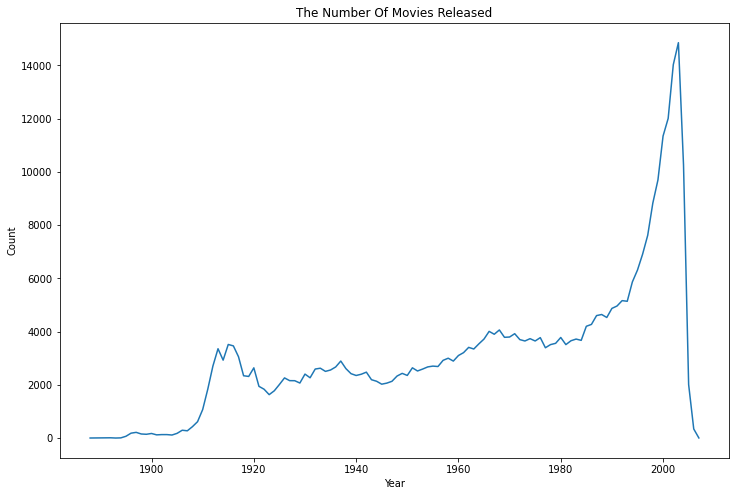

In [10]:
# The function plots a graph showing the counts of the movies each year
def show_movie_count_year(df):
  movie_count_df = df[['name', 'year']]
  df_grouped = movie_count_df.groupby('year')['name'].count()
  # Draw the line graph
  plt.figure(figsize = (12,8))
  df_grouped.plot(x='year', y=df_grouped, kind='line')
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.title('The Number Of Movies Released')
  plt.show()

# Show the resut
show_movie_count_year(movies_df)

###Highest ranked 'Thriller' movies?

In [11]:
# The function finds the highest ranked thriller movies ever
def get_highest_ranked_thriller_movies(df):
  thriller_df = df[df['genre'] == 'Thriller']
  max_rank = thriller_df['rank'].max(skipna=True)
  df_filtered = thriller_df[thriller_df['rank'] == max_rank]
  df_filtered = df_filtered.sort_values(by='year', ascending=False)
  return df_filtered

#Show the result-set
display(get_highest_ranked_thriller_movies(movies_df))

,first_name,last_name,name,year,rank,genre
279870,Zack,Resnicoff,"Clearing, The",2001,9.9,Thriller
36188,Julio (I),Bracho,Distinto amanecer,1943,9.9,Thriller


# Reflection
----

## What skills have you demonstrated in completing this project?

Accessing a SQL database through python, quering the SQL database using SQL query through python, using SQL SELECT to retrieve data from a single table as well as using it to query and retrieve the data from multiple tables by joining the data tables together. Saving the retrieved data into a Pandas DataFram object and transforming it into a .csv file. Analysing a dataset, retrieving the information with different criterias and plotting the result sets in appropriate plots.

## What caused you the most difficulty?

I did not find any difficulties working with any of the above. 